<a href="https://colab.research.google.com/github/woranut11/BSC_DPDM2025/blob/main/Ch3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
flood = pd.read_csv('/content/drive/MyDrive/data/flooding database.csv')
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning

## Missing Data

### Check missing Data

In [ ]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### Drop Recrod ที่มี missing ออก

drop ถ้ามี Missing

In [ ]:
flood.shape

(913, 23)

In [ ]:
flood_drop = flood.dropna()
flood_drop.shape

(13, 23)

Drop เฉพาะเกิด missing ในตัวแปรที่เราจะใช้
*   dfo_country
*   dfo_other_country
*   dfo_began
*   dfo_ended
*   dfo_dead
*   dfo_cause
*   dfo_senvrrity



In [ ]:
flood_drop1 = flood.dropna()
flood_drop1.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,0
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,0


In [ ]:
flood_drop1.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
7,DFO_1725_From_20010512_to_20010608,1725,std,0,Russia,0,106.619051,58.489746,5/12/01,6/8/01,...,"Snowmelt, Ice, Rain",2.0,35430.05,57438.0,57438.0,67466,1,0,-10028,1.0
83,DFO_2117_From_20030101_to_20030108,2117,otsu,0,Germany,Portugal,5.625135,49.207412,1/1/03,1/8/03,...,Heavy rain,1.0,5305.10,1242069.0,1242069.0,1307003,1,0,-64934,1.0
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,"Snowmelt, Ice, Rain",1.0,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0
125,DFO_2214_From_20030423_to_20030513,2214,std,0,Russia,0,79.316216,57.820476,4/23/03,5/13/03,...,"Snowmelt, Ice, Rain",1.0,54899.72,260971.0,260971.0,240926,1,0,20045,1.0


## เติม Dummy

In [ ]:
flood.isnull()['dfo_other_country']

,dfo_other_country
0,False
1,False
2,False
3,False
4,False
...,...
908,True
909,True
910,True
911,True


In [ ]:
flood_filldummy = flood.fillna({'dfo_other_country': 'Unknown'})

In [ ]:
flood_filldummy.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


## เติมด้วยค่ากลาง

In [ ]:
flood.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [ ]:
flood_fillmode = flood.fillna({'dfo_cause': 'Heavy rain'})
flood_fillmode.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติมด้วยตัวแทนของกลุ่ม

In [ ]:
flood.groupby(['dfo_severity','dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [ ]:
flood_sever1=flood[flood['dfo_severity']==1.0]
flood_sever15=flood[flood['dfo_severity']==1.5]
flood_sever2=flood[flood['dfo_severity']==2.0]

In [ ]:
flood_sever1=flood_sever1.fillna({'dfo_cause': 'Heavy rain'})
flood_sever15=flood_sever15.fillna({'dfo_cause': 'Heavy rain'})
flood_sever2=flood_sever2.fillna({'dfo_cause': 'Tropical Storm, Surge'})

In [ ]:
flood_fillgroup = pd.concat([flood_sever1,flood_sever15,flood_sever2])

In [ ]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### Noisy Data

In [ ]:
flood['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


Expore data

In [ ]:
from matplotlib import pyplot as plt

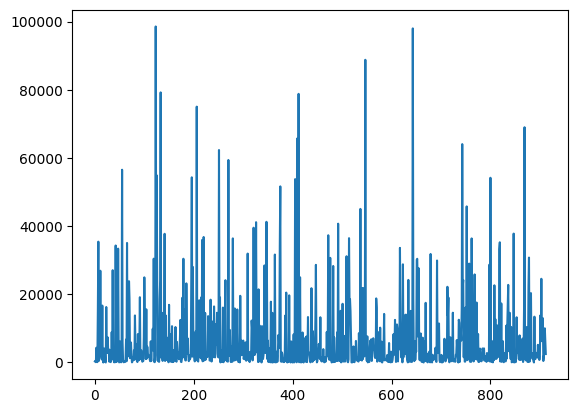

In [ ]:
plt.plot(flood['gfd_area'])

### Binning

ใช้ histogram ดู bin ที่เหมาะสม

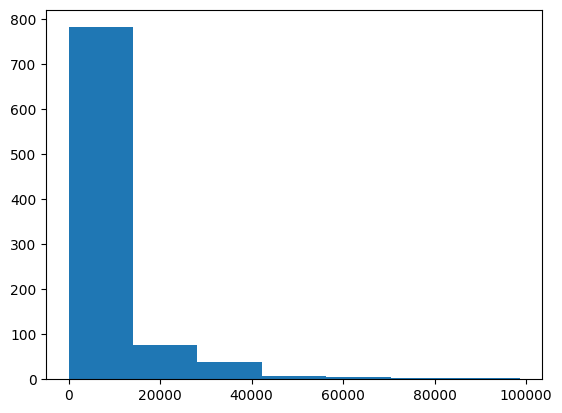

In [ ]:
outputhist =plt.hist(flood['gfd_area'], 7)

In [ ]:
outputhist[1]

array([    0.        , 14078.23142857, 28156.46285714, 42234.69428571,
       56312.92571429, 70391.15714286, 84469.38857143, 98547.62      ])

In [ ]:
import numpy as np
# Assuming 'flood' DataFrame and 'gfd_area' column are available from previous steps

def get_bin_means(data, num_bins):
    # Calculate histogram to get bin edges
    # We only need the bin_edges, so we don't store counts or patches
    _, bin_edges = np.histogram(data, bins=num_bins)

    bin_means = []
    for i in range(len(bin_edges) - 1):
        lower_bound = bin_edges[i]
        upper_bound = bin_edges[i+1]

        # Filter data points that fall within the current bin
        # Use <= for the upper bound to include the last value in the last bin correctly
        if i == len(bin_edges) - 2: # Last bin
            values_in_bin = data[(data >= lower_bound) & (data <= upper_bound)]
        else:
            values_in_bin = data[(data >= lower_bound) & (data < upper_bound)]

        # Calculate the mean of values in the bin
        if not values_in_bin.empty:
            bin_means.append(values_in_bin.mean())
        else:
            bin_means.append(np.nan) # Append NaN if no values in bin

    return bin_means, bin_edges

# Get the means for 'gfd_area' with 30 bins
means_per_bin, bin_edges = get_bin_means(flood['gfd_area'], 30)

# Display the results
print("Bin Edges:", bin_edges)
print("Mean of values per bin:", means_per_bin)


Bin Edges: [    0.          3284.92066667  6569.84133333  9854.762
 13139.68266667 16424.60333333 19709.524      22994.44466667
 26279.36533333 29564.286      32849.20666667 36134.12733333
 39419.048      42703.96866667 45988.88933333 49273.81
 52558.73066667 55843.65133333 59128.572      62413.49266667
 65698.41333333 68983.334      72268.25466667 75553.17533333
 78838.096      82123.01666667 85407.93733333 88692.858
 91977.77866667 95262.69933333 98547.62      ]
Mean of values per bin: [np.float64(1040.4679667282808), np.float64(4837.082380952381), np.float64(7957.606885245903), np.float64(11223.812285714286), np.float64(14445.323421052633), np.float64(18162.312307692304), np.float64(21851.07083333333), np.float64(24341.333846153848), np.float64(28150.912), np.float64(30889.8025), np.float64(34516.695555555554), np.float64(36986.39571428571), np.float64(40658.8725), np.float64(45410.015), nan, np.float64(51648.83), np.float64(54288.5775), np.float64(56527.97), np.float64(60849.195), 

In [ ]:
def put_value_into_bins(value, bin_edge):
    for i in range(len(bin_edge) - 1):
        if value >= bin_edge[i] and value < bin_edge[i+1]:
            new_val = bin_edge[i] + (bin_edge[i+1] - bin_edge[i]) / 2
            return new_val

In [ ]:
put_value_into_bins(30000, outputhist[1])

np.float64(35195.578571428574)

In [ ]:
flood['gfd_area_bin'] = flood['gfd_area'].apply(lambda x: put_value_into_bins(x, outputhist[1]))

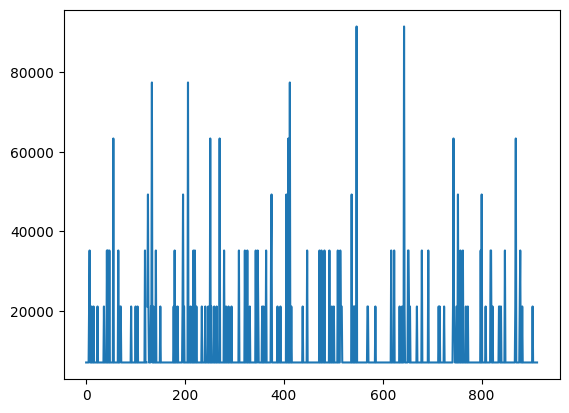

In [ ]:
plt.plot(flood['gfd_area_bin'])

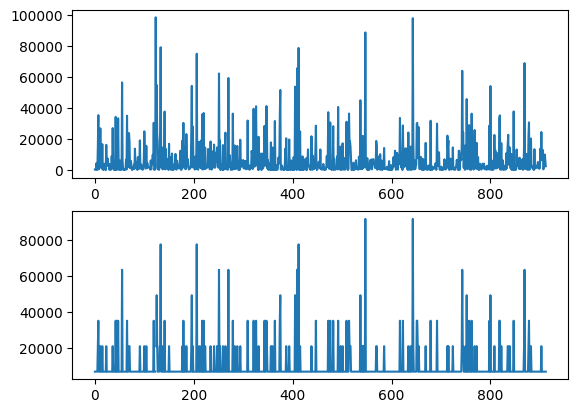

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'])
plt.subplot(2,1,2)
plt.plot(flood['gfd_area_bin'])

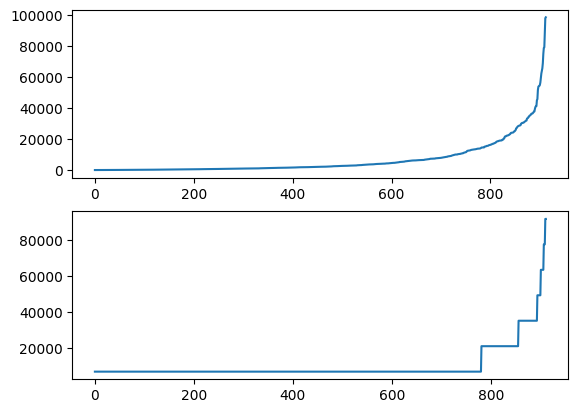

In [ ]:
from numpy import sort
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(2,1,2)
plt.plot(flood['gfd_area_bin'].sort_values().reset_index(drop=True))

### Outlier Removal

{'whiskers': [<matplotlib.lines.Line2D at 0x781808d49340>,
 'caps': [<matplotlib.lines.Line2D at 0x781808d49940>,
 'boxes': [<matplotlib.lines.Line2D at 0x781808fa11f0>],
 'medians': [<matplotlib.lines.Line2D at 0x781808d49d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x781808d4a060>],
 'means': []}

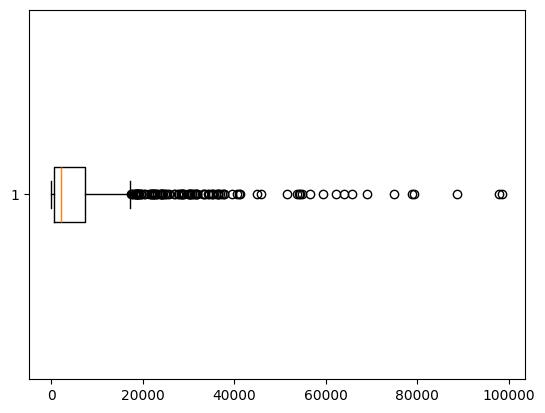

In [ ]:
plt.boxplot(flood['gfd_area'],vert=False)

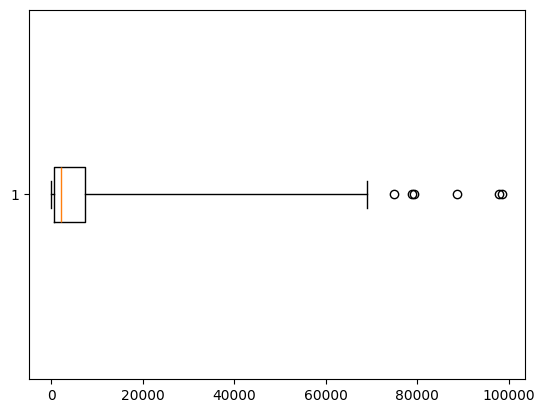

In [ ]:
outputbox=plt.boxplot(flood['gfd_area'],vert=False,whis=10)

In [ ]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x781808db3e60>,
 'caps': [<matplotlib.lines.Line2D at 0x781808de4410>,
 'boxes': [<matplotlib.lines.Line2D at 0x781808db1880>],
 'medians': [<matplotlib.lines.Line2D at 0x781808de4a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x781808de4ce0>],
 'means': []}

In [ ]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [ ]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [ ]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliers

In [ ]:
flood_nooutlier = flood[flood['gfd_area'] < outputbox['whiskers'][1].get_xdata()[1]]

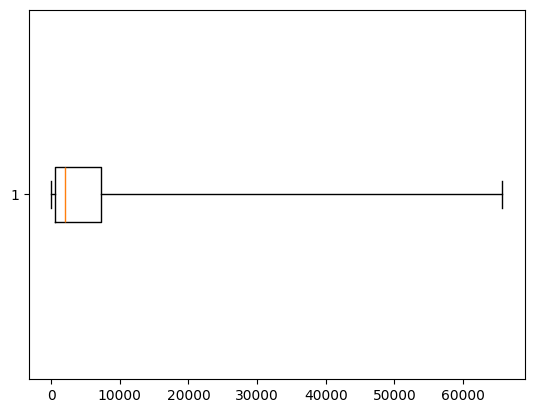

In [ ]:
outputbox2=plt.boxplot(flood_nooutlier['gfd_area'],vert=False,whis=10)

ตามหาค่า outlier

In [ ]:
flood[flood['gfd_area'].isin(outputbox['fliers'][0].get_xdata())]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,1.0,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0,NaN
133,DFO_2248_From_20030611_to_20031010,2248,std,0,Bangladesh,India,90.853814,26.170616,6/11/03,10/10/03,...,2.0,79213.43,16822143.0,16822144.0,37057874,0,-1,-20235731,NaN,77430.272857
206,DFO_2507_From_20040620_to_20041007,2507,std,0,India,Bangladesh,85.891802,25.498908,6/20/04,10/7/04,...,2.0,75030.80,19855086.0,19855104.0,39177850,0,-18,-19322764,NaN,77430.272857
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN,77430.272857
547,DFO_3494_From_20090510_to_20090701,3494,std,FL-2009-000124-VNM,Vietnam,NaN,104.302485,20.673965,5/10/09,7/1/09,...,1.0,88773.57,264625.0,213143.0,264625,1,51482,0,1.0,91508.504286
643,DFO_3799_From_20100401_to_20110524,3799,std,NaN,USA,Canada,-97.219210,48.678802,4/1/10,5/24/11,...,2.0,97982.77,239676.0,219045.0,239680,0,20631,-4,NaN,91508.504286


# Data Intergration

Data Exploration

In [ ]:
project_df=pd.read_csv('/content/drive/MyDrive/data/Copy of Copy of opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [ ]:
unit_df=pd.read_csv('/content/drive/MyDrive/data/Copy of Copy of opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [ ]:
for i in project_df.columns:
  print(i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


In [ ]:
for i in unit_df.columns:
  print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more columns to the table (x-Data Intergration)

map()

developer_name_th

subdistrict_name_th

neighborhood_name_th

province_name_th

In [ ]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'], keep='last')
unit_df['project_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

## Dedupplication

ดูก่อนว่า Data มัน duplicate ยังไง

In [ ]:
project_df.duplicated().any()

np.True_

In [ ]:
project_df.duplicated().sum()

np.int64(2)

In [ ]:
project_df.duplicated(keep = False)

,0
0,False
1,False
2,False
3,False
4,False
...,...
23862,False
23863,False
23864,False
23865,False


In [ ]:
project_df[project_df.duplicated()]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
project_df.duplicated(subset=['project_id'], keep=False).sum()

np.int64(6981)

In [ ]:
project_df[project_df.duplicated(subset='project_id', keep=False)].head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
8,3795.0,5f04029cb285eb00194de1dd,City park sakaeo,ซิตี้ปาร์ค สระแก้ว 2,4,Commercial,อาคารพาณิชย์,1900000.0,5f03f344b285eb00194de191,"Sa Kaeo Development Co., Ltd.",...,1.0,NaN,NaN,1.0,2020-07-07 12:05:32,2016-01-01 07:00:00,2020-12-04 10:33:25,baania,https://baania.com/th/project/ซิตี้ปาร์ค-สระแก...,2023-06-11
23,20554.0,project_7343,Baan Nantana Garden,บ้านนันทนาการ์เด้นท์,3,Townhome,ทาวน์โฮม,1490000.0,developer_10510,NaN,...,1.0,1.0,1.0,1.0,2017-05-22 11:28:57,NaN,2020-12-04 10:37:28,baania,https://baania.com/th/project/บ้านนันทนาการ์เด...,2023-06-11
24,12456.0,project_4054,Cubist Townhome Sanambinnam,คิวบิสทาวน์โฮม สนามบินน้ำ,3,Townhome,ทาวน์โฮม,3790000.0,developer_2417,"PLUS PROPERTY CO., LTD.",...,1.0,NaN,NaN,1.0,2017-02-23 13:40:12,NaN,2021-07-15 15:30:11,baania,https://baania.com/th/project/คิวบิสทาวน์โฮม-ส...,2023-06-11
34,5047.0,5f34e60ec801fb0019dacbd6,Taraville Pechabura,ธาราวิลล์เพชบุระ,3,Townhome,ทาวน์โฮม,1000000.0,5f34e256c801fb0019dacbbe,"Thanthong Property and Construction Co., Ltd.",...,NaN,NaN,NaN,1.0,2020-08-13 14:04:46,NaN,2022-08-04 15:00:08,baania,https://baania.com/th/project/ธาราวิลล์เพชบุระ...,2023-06-11


ลบข้อมูลที่มี project_id ซ้ำกัน โดยเก็บไว้เฉพาะข้อมูลล่าสุด (ตัวล่าง)

In [ ]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'], keep='last')

In [ ]:
unit_df['ชื่อโครงการ'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

In [ ]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,project_name_th,ชื่อโครงการ
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,ไลฟ์ แอท รัชดา - สุทธิสาร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บ้านสวนทรัพย์ธานี
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,สกายไลน์ อมตะ
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ


map data ที่ไม่มี duplicated index

In [ ]:
unit_df['ชื่อโครงการ']=unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

### HW3 กลับไปเติมข้อมูล Columns ที่จำเป็นที่เหลือ

In [ ]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'], keep='last')
unit_df['developer_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['developer_name_th'])
unit_df['neighborhood_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['neighborhood_name_th'])
unit_df['subdistrict_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['subdistrict_name_th'])
unit_df['district_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['district_name_th'])
unit_df['province_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['province_name_th'])

In [ ]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


## Add more data (Y-data integration)

In [ ]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


In [ ]:
set (unit_df['project_id'])

{'project_3492',
 'project_8811',
 'project_4269',
 'project_7289',
 'project_14904',
 'project_3871',
 '645c79d51a8af60013e3b816',
 'project_5785',
 '629ef961a3adf700138404be',
 'project_16145',
 'project_2951',
 'project_11784',
 'project_6678',
 'project_964',
 '5ea25fc178b3120012dd4b9f',
 'project_2923',
 'project_12409',
 '63d09c637866db00121117cf',
 'project_2638',
 'project_15696',
 '5fd1a4f8ee0d7f001240a8b0',
 'project_9254',
 '6188e20eb9424100136bb45f',
 'project_6644',
 '5fd05874ddba000013c68542',
 '632817adea1add001a5491ff',
 'project_3907',
 'project_6927',
 'project_14163',
 'project_17226',
 'project_14215',
 '63ca42357866db00121115f1',
 '5eafd70f68253d0012adc810',
 '5ee72bcadda791001299b8bb',
 'project_3856',
 'project_13592',
 'project_6622',
 'project_11820',
 'project_13178',
 '621f32cac1620300140bc33f',
 '6242ad85587c1b00149b6fff',
 'project_8582',
 'project_12392',
 '6284c1323937f900161992cb',
 'project_13605',
 'project_11014',
 'project_14510',
 '62870fe63937f9001

สมมติว่า database เก็บแยก ชนิดของบ้าน

In [ ]:
house = unit_df[unit_df['propertytype_name_th']=='บ้าน']
condo = unit_df[unit_df['propertytype_name_th']=='คอนโด']

In [ ]:
house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [ ]:
house.shape

(17777, 35)

In [ ]:
condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3700000.0,...,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4200000.0,...,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
8,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3350000.0,...,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร
14,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15900000.0,...,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร
16,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4700000.0,...,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร


In [ ]:
condo.shape

(12806, 35)

รวมข้อมูลบ้าน และ คอนโด

In [ ]:
house_condo = pd.concat([house,condo])
house_condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


## Data Transfromation

ในกรณีที่ ข้อมูลใน column เดียวกันใช้ หน่วยไม่เหมือนกัน ต้องมีการแปลงข้อมูลก่อน

ทำให้หน่วยของราคา ไม่เท่ากัน (condo หน่วยบาท vs  house หน่วยล้านบาท)

In [ ]:
house['price_min'] = house['price_min']/1000000
house

/tmp/ipython-input-3989735810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_min'] = house['price_min']/1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.5000,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.6000,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.7900,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.3000,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.0,3.2000,...,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,บ้านณัฐชากรีนวิลล์,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.0,3.8614,...,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,กลันตา พลัส อีโค่ วิลเลจ,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.0,5.3900,...,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,ชวนชม 5,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,0.8800,...,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านคุรุสภา นครราชสีมา,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา


ตรวจสอบ scale คร่าวๆ

In [ ]:
from matplotlib import pyplot as plt

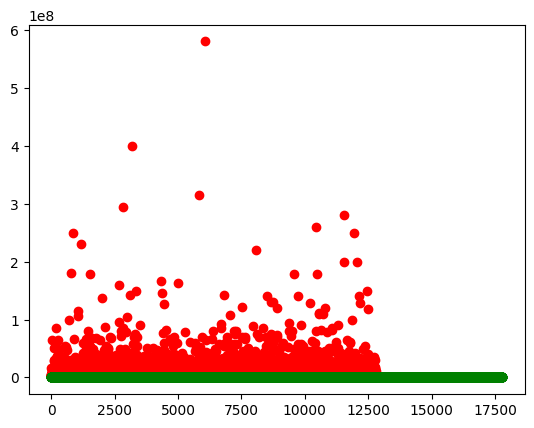

In [ ]:
plt.scatter(range(len(condo['price_min'])),condo['price_min'],c = 'r')
plt.scatter(range(len(house['price_min'])),house['price_min'],c = 'g')


แปลงค่า หน่วยของ condo ให้เป็นหลักล้านแล้ว รวม data

/tmp/ipython-input-3997721093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo['price_min'] = condo['price_min']/1000000


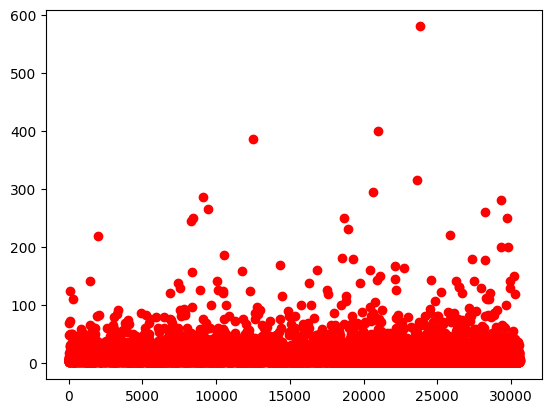

In [ ]:
condo['price_min'] = condo['price_min']/1000000
condo_house = pd.concat([house,condo])
plt.scatter(range(len(condo_house['price_min'])),condo_house['price_min'],c = 'r')

In [ ]:
condo_house[condo_house['price_min']>300]['url_unittype'].values

array(['https://baania.com/th/project/อสงไขย-63f6e3b09b028e00130ae6e5/บ้านเดี่ยวสามชั้น-63f6e58e9b028e00130ae6f6',
       'https://baania.com/th/project/บันยัน-ทรี-เรสซิเดนซ์-ริเวอร์ไซด์-กรุงเทพ-15531/penthouse-unittype_36249',
       'https://baania.com/th/project/โฟร์ซีซั่นส์-ไพรเวท-เรสซิเด้นซ์-2540/penthouse-unittype_7639',
       'https://baania.com/th/project/เดอะ-สุโขทัย-เรสซิเด้นซ์-16305/penthouse-unittype_37324'],
      dtype=object)

In [ ]:
condo_house[condo_house['price_min']>300]

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
30469,21591,63f6e58e9b028e00130ae6f6,63f6e3b09b028e00130ae6e5,บ้านเดี่ยวสามชั้น,1,Detached House,บ้าน,NaN,2918.00,385.0,...,baania,https://baania.com/th/project/อสงไขย-63f6e3b09...,2023-06-11,อสงไขย,อสงไขย,บริษัท อาเมทัส ดีเวลลอปเม้นท์ จำกัด,เขาพระตำหนัก,หนองปรือ,บางละมุง,ชลบุรี
11071,11195,unittype_36249,project_15531,Penthouse,2,Condo,คอนโด,NaN,844.56,400.0,...,baania,https://baania.com/th/project/บันยัน-ทรี-เรสซิ...,2023-06-11,บันยัน ทรี เรสซิเดนซ์ ริเวอร์ไซด์ กรุงเทพ,บันยัน ทรี เรสซิเดนซ์ ริเวอร์ไซด์ กรุงเทพ,บริษัท เนอวานา ไดอิ จำกัด (มหาชน),คลองสาน,คลองสาน,คลองสาน,กรุงเทพมหานคร
19928,4397,unittype_7639,project_2540,Penthouse,2,Condo,คอนโด,NaN,1050.00,315.0,...,baania,https://baania.com/th/project/โฟร์ซีซั่นส์-ไพร...,2023-06-11,โฟร์ซีซั่นส์ ไพรเวท เรสซิเด้นซ์,โฟร์ซีซั่นส์ ไพรเวท เรสซิเด้นซ์,บริษัท คันทรี่ กรุ๊ป ดีเวลลอปเมนท์ จำกัด (มหาชน),ยานาวา,ยานนาวา,สาทร,กรุงเทพมหานคร
20668,34097,unittype_37324,project_16305,Penthouse,2,Condo,คอนโด,NaN,1182.00,580.0,...,baania,https://baania.com/th/project/เดอะ-สุโขทัย-เรส...,2023-06-11,เดอะ สุโขทัย เรสซิเด้นซ์,เดอะ สุโขทัย เรสซิเด้นซ์,บริษัท เอชเคอาร์ อินเตอร์เนชั่นแนล (ประเทศไทย)...,สาทร,ทุ่งมหาเมฆ,สาทร,กรุงเทพมหานคร


## Column Alignment

สลับ column ของ data condo

In [ ]:
condo.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'project_name_th', 'ชื่อโครงการ', 'developer_name_th',
       'neighborhood_name_th', 'subdistrict_name_th', 'district_name_th',
       'province_name_th'],
      dtype='object')

In [ ]:
columns_titles = ['ชื่อโครงการ', 'developer_name_th',
       'neighborhood_name_th', 'subdistrict_name_th', 'district_name_th',
       'province_name_th','row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'project_name_th']
condo_swap = condo.reindex(columns=columns_titles)

In [ ]:
condo_swap.head()

,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,row_number,unittype_id,project_id,name_th,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,project_name_th
0,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,37586,unittype_35602,project_15270,Studio,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),...,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
8,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร,33884,unittype_36928,project_15818,1 Bedroom,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์
14,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร,34574,unittype_37590,project_16368,4 Bedroom,...,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์
16,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร,39469,unittype_40049,project_17461,2 Bedroom,...,NaN,NaN,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19


In [ ]:
condoswap_house = pd.concat([house,condo_swap])
condoswap_house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.50,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.60,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.79,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.30,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [ ]:
condoswap_house.tail()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,2,Condo,คอนโด,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,บริษัท พฤกษา เรียลเอสเตท จำกัด (มหาชน),วัดไตรรัตนาราม,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร
43357,32766,unittype_32126,project_13619,1 Bedroom,2,Condo,คอนโด,NaN,31.0,6.50,...,baania,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,วาลเด้น อโศก,วาลเด้น อโศก,บริษัท ฮาบิแทท กรุ๊ป จำกัด,อโศก,คลองเตยเหนือ,วัฒนา,กรุงเทพมหานคร
43364,12599,unittype_24778,project_9877,2 Bedroom,2,Condo,คอนโด,NaN,49.0,3.50,...,baania,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,ซีซี คอนโดมิเนียม 2,ซีซี คอนโดมิเนียม 2,บริษัท รวมโชคพัฒนา (พัทยา) จำกัด,บุญสัมพันธ์,หนองปรือ,บางละมุง,ชลบุรี
43366,11147,unittype_35831,project_15356,Studio,2,Condo,คอนโด,NaN,27.0,4.99,...,baania,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,ไอดีโอ โมบิ รางน้ำ,ไอดีโอ โมบิ รางน้ำ,บริษัท อนันดา ดีเวลลอปเม้นท์ จำกัด (มหาชน),รางน้ำ,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร
43373,9465,unittype_35686,project_15298,2 Bedroom,2,Condo,คอนโด,NaN,45.0,3.49,...,baania,https://baania.com/th/project/แกรนด์-คอนโดมิเน...,2023-06-11,แกรนด์ คอนโดมิเนียม วุฒากาศ 57,แกรนด์ คอนโดมิเนียม วุฒากาศ 57,บริษัท โมเดิร์น เฮาส์ พร็อพเพอร์ตี้ จำกัด,จอมทอง,บางค้อ,จอมทอง,กรุงเทพมหานคร


In [ ]:
condo_swap['price_min_bath'] = condo_swap['price_min']*1000000

In [ ]:
condo_swap.shape

(12806, 36)

In [ ]:
house.shape

(17777, 35)

In [ ]:
pd.concat([condo_swap,house])

,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,row_number,unittype_id,project_id,name_th,...,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,project_name_th,price_min_bath
0,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,37586,unittype_35602,project_15270,Studio,...,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,3700000.0
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),...,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,4200000.0
8,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร,33884,unittype_36928,project_15818,1 Bedroom,...,NaN,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์,3350000.0
14,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร,34574,unittype_37590,project_16368,4 Bedroom,...,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์,15900000.0
16,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร,39469,unittype_40049,project_17461,2 Bedroom,...,NaN,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19,4700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,...,NaN,NaN,NaN,2020-12-04 10:38:02,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,บ้านณัฐชากรีนวิลล์,NaN
43363,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,...,NaN,NaN,NaN,2021-11-12 13:24:08,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,กลันตา พลัส อีโค่ วิลเลจ,NaN
43367,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,...,NaN,NaN,NaN,2023-03-28 15:00:05,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,ชวนชม 5,NaN
43369,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,...,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านคุรุสภา นครราชสีมา,NaN


In [ ]:
pd.concat([house,condo_swap])

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,price_min_bath
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,NaN
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.50,...,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,NaN
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.60,...,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,NaN
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.79,...,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา,NaN
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.30,...,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,2,Condo,คอนโด,NaN,NaN,NaN,...,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,บริษัท พฤกษา เรียลเอสเตท จำกัด (มหาชน),วัดไตรรัตนาราม,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร,NaN
43357,32766,unittype_32126,project_13619,1 Bedroom,2,Condo,คอนโด,NaN,31.0,6.50,...,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,วาลเด้น อโศก,วาลเด้น อโศก,บริษัท ฮาบิแทท กรุ๊ป จำกัด,อโศก,คลองเตยเหนือ,วัฒนา,กรุงเทพมหานคร,6500000.0
43364,12599,unittype_24778,project_9877,2 Bedroom,2,Condo,คอนโด,NaN,49.0,3.50,...,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,ซีซี คอนโดมิเนียม 2,ซีซี คอนโดมิเนียม 2,บริษัท รวมโชคพัฒนา (พัทยา) จำกัด,บุญสัมพันธ์,หนองปรือ,บางละมุง,ชลบุรี,3500000.0
43366,11147,unittype_35831,project_15356,Studio,2,Condo,คอนโด,NaN,27.0,4.99,...,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,ไอดีโอ โมบิ รางน้ำ,ไอดีโอ โมบิ รางน้ำ,บริษัท อนันดา ดีเวลลอปเม้นท์ จำกัด (มหาชน),รางน้ำ,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,4990000.0


### Add Data Sorce Column

เตรียมปัญหาโดยการลบ column proprety type ออก

In [ ]:
house.head()

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.50,NaN,NaN,2.0,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.60,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.79,NaN,NaN,1.0,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.30,NaN,NaN,2.0,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [ ]:
house = unit_df[unit_df['propertytype_name_th']=='บ้าน'].copy()
condo = unit_df[unit_df['propertytype_name_th']=='คอนโด'].copy()

house = house.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])
condo = condo.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])

In [ ]:
condo.head()

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,source,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
0,37586,unittype_35602,project_15270,Studio,NaN,30.00,3.70,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),NaN,48.00,4.20,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
8,33884,unittype_36928,project_15818,1 Bedroom,NaN,49.00,3.35,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร
14,34574,unittype_37590,project_16368,4 Bedroom,NaN,170.00,15.90,NaN,NaN,NaN,...,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร
16,39469,unittype_40049,project_17461,2 Bedroom,NaN,48.88,4.70,NaN,NaN,NaN,...,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร


In [ ]:
house['ดาต้าซอส'] = 'house'
condo['ดาต้าซอส'] = 'condo'


In [ ]:
house.head()

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,ดาต้าซอส
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6500000.0,NaN,NaN,2.0,...,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4600000.0,NaN,NaN,2.0,...,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2790000.0,NaN,NaN,1.0,...,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5300000.0,NaN,NaN,2.0,...,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,house


In [ ]:
condo

In [ ]:
condo_house=pd.concat([house,condo])

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,url_unittype,day,project_name_th,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,ดาต้าซอส
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6500000.0,NaN,NaN,2.0,...,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4600000.0,NaN,NaN,2.0,...,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2790000.0,NaN,NaN,1.0,...,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5300000.0,NaN,NaN,2.0,...,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,...,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,บริษัท พฤกษา เรียลเอสเตท จำกัด (มหาชน),วัดไตรรัตนาราม,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร,condo
43357,32766,unittype_32126,project_13619,1 Bedroom,NaN,31.0,6500000.0,NaN,NaN,NaN,...,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,วาลเด้น อโศก,วาลเด้น อโศก,บริษัท ฮาบิแทท กรุ๊ป จำกัด,อโศก,คลองเตยเหนือ,วัฒนา,กรุงเทพมหานคร,condo
43364,12599,unittype_24778,project_9877,2 Bedroom,NaN,49.0,3500000.0,NaN,NaN,NaN,...,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,ซีซี คอนโดมิเนียม 2,ซีซี คอนโดมิเนียม 2,บริษัท รวมโชคพัฒนา (พัทยา) จำกัด,บุญสัมพันธ์,หนองปรือ,บางละมุง,ชลบุรี,condo
43366,11147,unittype_35831,project_15356,Studio,NaN,27.0,4990000.0,NaN,NaN,NaN,...,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,ไอดีโอ โมบิ รางน้ำ,ไอดีโอ โมบิ รางน้ำ,บริษัท อนันดา ดีเวลลอปเม้นท์ จำกัด (มหาชน),รางน้ำ,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,condo
